In [193]:
import numpy as np
import pandas as pd

**Data Pre-processing**

In [194]:
# Trích xuất dữ liệu
df = pd.read_csv("data_1.csv", sep = ';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [195]:
df.shape

(4424, 37)

In [196]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [197]:
# Chuẩn hóa dữ liệu 
numeric_features = df.columns[:-1]

for col_name in numeric_features:
    mean = df[col_name].mean()
    std = df[col_name].std()
    df[col_name] = (df[col_name] - mean)/std

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294795,-0.095459,2.490614,-4.209044,0.350043,-0.350191,-0.804750,-0.126284,-0.036014,-0.669702,...,-0.28241,-2.838016,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,Dropout
1,-0.294795,-0.209845,-0.554005,0.192559,0.350043,-0.350191,2.076585,-0.126284,-1.189625,-1.256285,...,-0.28241,-0.105714,-0.522623,0.518845,0.659487,-0.199418,0.876123,-1.105097,0.347160,Graduate
2,-0.294795,-1.010546,2.490614,0.103393,0.350043,-0.350191,-0.804750,-0.126284,1.117596,0.959694,...,-0.28241,-0.105714,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,Dropout
3,-0.294795,-0.095459,0.207150,0.444065,0.350043,-0.350191,-0.804750,-0.126284,1.181686,0.959694,...,-0.28241,-0.105714,0.490561,0.187144,0.416403,-0.199418,-0.813161,-1.466705,-1.375356,Graduate
4,1.356059,1.162785,-0.554005,-0.408343,-2.856147,-0.350191,-2.472892,-0.126284,1.117596,1.024870,...,-0.28241,-0.105714,-0.522623,0.518845,0.531548,-0.199418,0.876123,-1.105097,0.347160,Graduate


**FEATURE ENGINEERING**

In [198]:
from matplotlib import pyplot as plt
import seaborn as sns

In [199]:
continuous_variable = [
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

df_continuous = df[continuous_variable].copy()

<Axes: >

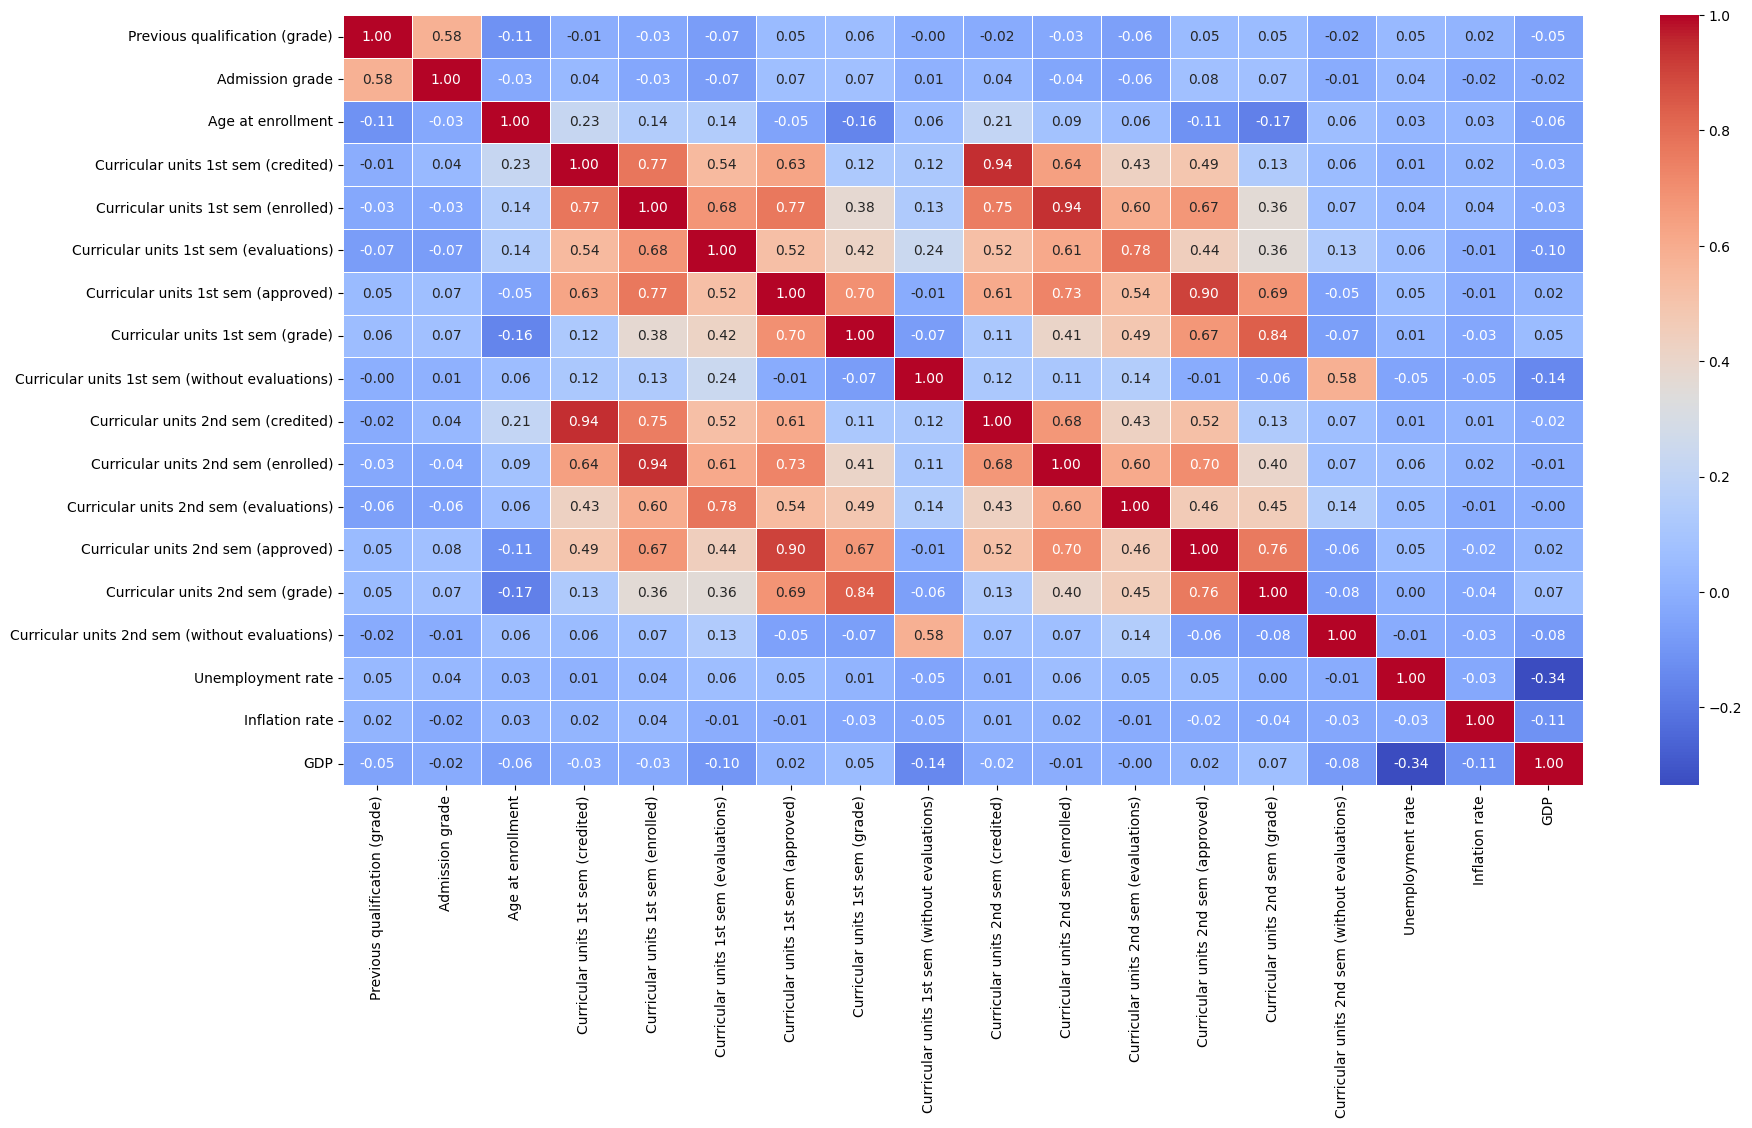

In [200]:
# Ma trận tương quan
means = df_continuous.mean()
num_feature = df_continuous.shape[1]
cov_matrix = np.zeros((num_feature, num_feature))

for i, col_i in enumerate(df_continuous.columns):
    for j, col_j in enumerate(df_continuous.columns):
        cov_matrix[i,j] = np.corrcoef(df_continuous[col_i], df_continuous[col_j])[0,1]

plt.figure(figsize=(20, 10)) 
sns.heatmap(cov_matrix, xticklabels=df_continuous.columns, yticklabels=df_continuous.columns, annot = True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

In [201]:
df = df.drop(columns=['Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)'])

**SPLITTING DATA**

In [202]:
from sklearn.model_selection import train_test_split

def split_data(df):
    data = df.to_numpy()
    X = data[:, :-1]
    Y = data[:, -1]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

    print('train:', X_train.shape, Y_train.shape)
    print('test:', X_test.shape, Y_test.shape)
    return X_train, X_test, Y_train, Y_test

**LOGISTIC REGRESSION**

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [223]:
# Chuyển đổi giá trị target
def transform_target_log(value: str) -> int:
    if value == "Graduate":
        return 1
    return 0

df_logreg = df.copy()
df_logreg["Target"] = df_logreg["Target"].apply(transform_target_log)
df_logreg["Target"].unique()

array([0, 1])

In [215]:
# Chia bộ dữ liệu
X1_train, X1_test, Y1_train, Y1_test = split_data(df_logreg)

train: (3539, 33) (3539,)
test: (885, 33) (885,)


In [216]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X1_train, Y1_train)
Y1_pred = logreg.predict(X1_test)

In [217]:
accuracy_log = accuracy_score(Y1_test, Y1_pred)
accuracy_log

0.7988700564971751

**SOFTMAX REGRESSION**

In [224]:
# Chuyển đổi giá trị target
def transform_target_softmax(value: str) -> int:
    if value == "Enrolled":
        return 0
    elif value == "Dropout":
        return 1
    return 2

df_softreg = df.copy()
df_softreg["Target"] = df_softreg["Target"].apply(transform_target_softmax)
df_softreg["Target"].unique()

array([1, 2, 0])

In [225]:
# Chia bộ dữ liệu mới
X2_train, X2_test, Y2_train, Y2_test = split_data(df_softreg)

train: (3539, 33) (3539,)
test: (885, 33) (885,)


In [227]:
softreg = LogisticRegression(max_iter=500)
softreg.fit(X2_train, Y2_train)
Y2_pred = softreg.predict(X2_test)

In [228]:
accuracy_softmax = accuracy_score(Y2_test, Y2_pred)
accuracy_softmax

0.7423728813559322